In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image

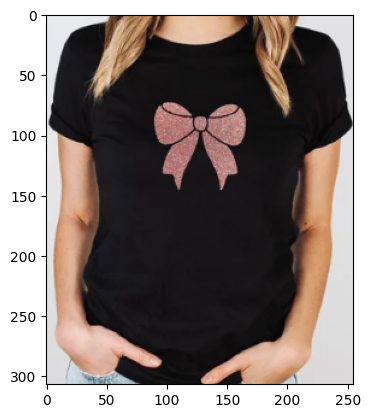

In [2]:
file_path = "C:/Users/jiash/OneDrive/Desktop/deep_learning/base_data/training/bows/Screenshot 2024-07-09 215332.png"
img = image.load_img(file_path)
plt.imshow(img)



In [3]:
cv2.imread(file_path)

array([[[234, 232, 230],
        [234, 232, 230],
        [235, 233, 231],
        ...,
        [228, 226, 226],
        [229, 227, 227],
        [229, 227, 227]],

       [[234, 232, 230],
        [234, 232, 230],
        [235, 233, 231],
        ...,
        [228, 226, 226],
        [229, 227, 227],
        [229, 227, 227]],

       [[234, 232, 230],
        [234, 232, 230],
        [235, 233, 231],
        ...,
        [228, 226, 226],
        [229, 227, 227],
        [229, 227, 227]],

       ...,

       [[221, 219, 219],
        [221, 219, 219],
        [221, 219, 219],
        ...,
        [218, 217, 219],
        [218, 217, 219],
        [218, 217, 219]],

       [[221, 219, 219],
        [221, 219, 219],
        [221, 219, 219],
        ...,
        [218, 217, 219],
        [218, 217, 219],
        [218, 217, 219]],

       [[221, 219, 219],
        [221, 219, 219],
        [221, 219, 219],
        ...,
        [218, 217, 219],
        [218, 217, 219],
        [218, 217, 219]]

In [4]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [5]:
train_file_path = "C:/Users/jiash/OneDrive/Desktop/deep_learning/base_data/training/"
validation_file_path = "C:/Users/jiash/OneDrive/Desktop/deep_learning/base_data/validation"
train_dataset = train.flow_from_directory(train_file_path,
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset = train.flow_from_directory(validation_file_path,
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')


Found 74 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'bows': 0, 'no_bows': 1}

In [7]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid') 
                                    # multiclass ke liye softmax aur binary ke liye sigmoid
                                        
                                                            ])

C:\Users\jiash\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
            metrics = ['accuracy']
                       )

In [11]:
model_fit = model.fit(train_dataset, steps_per_epoch=5, epochs=30, validation_data=validation_dataset)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8259 - loss: 0.1867 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 1.0000 - val_loss: 0.0202
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 1.0000 - loss: 0.0286 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 1.0000 - val_loss: 0.0300
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.8824 - val_loss: 0.2055
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - va

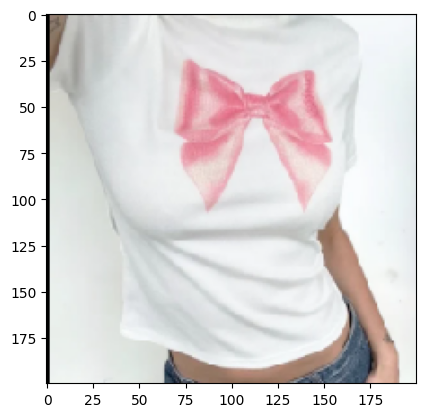

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
it has bows


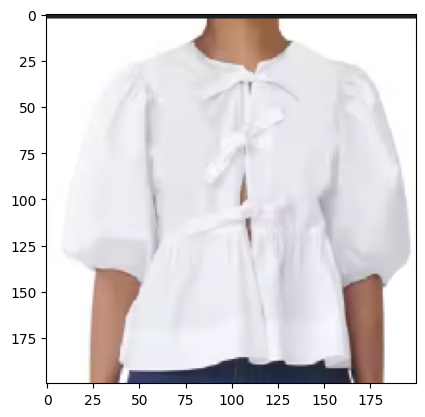

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
it has bows


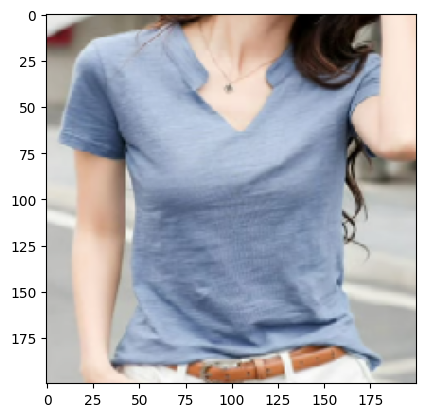

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
does not have bows


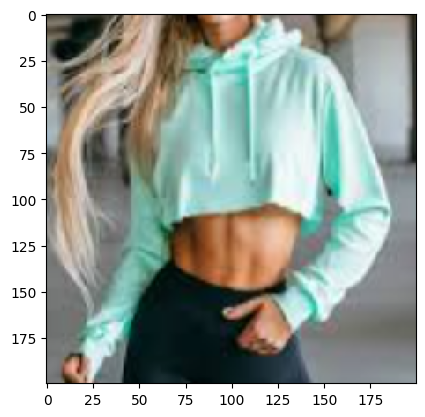

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
does not have bows


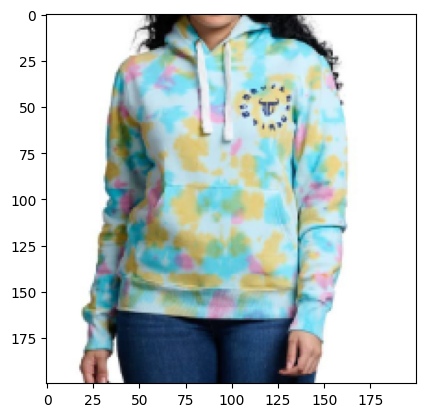

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
does not have bows


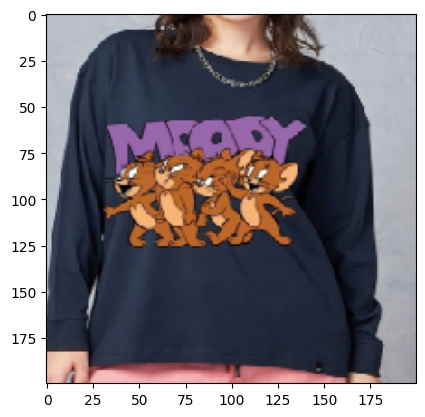

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
does not have bows


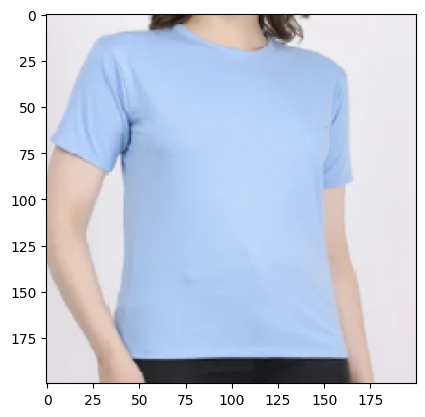

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
does not have bows


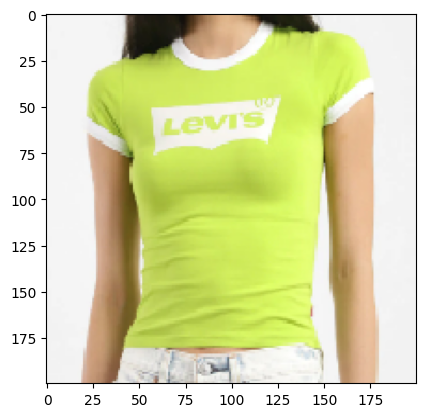

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
does not have bows


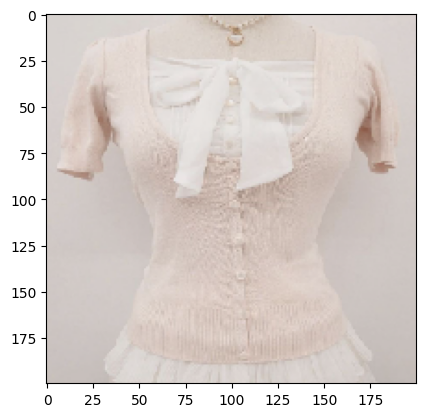

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
it has bows


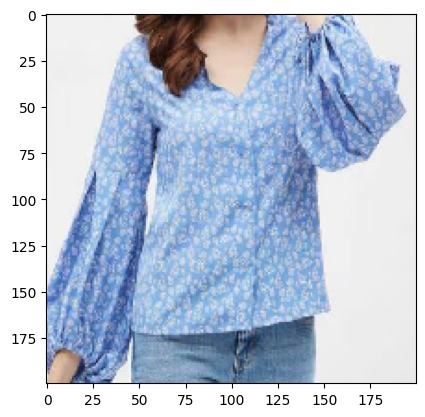

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
does not have bows


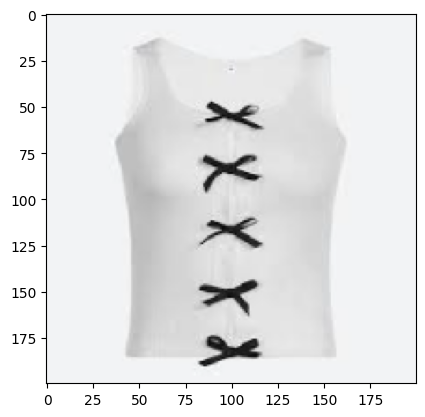

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
it has bows


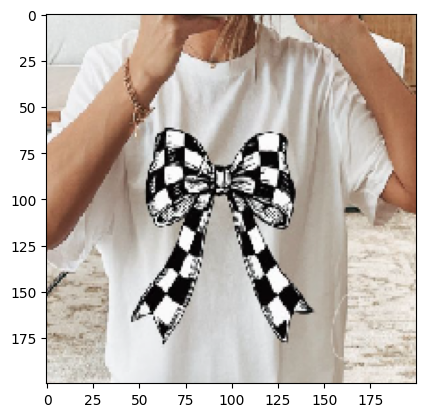

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
it has bows


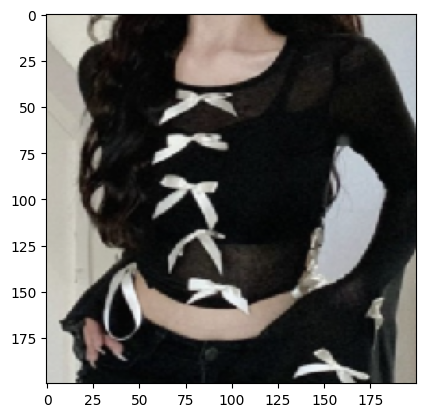

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
it has bows


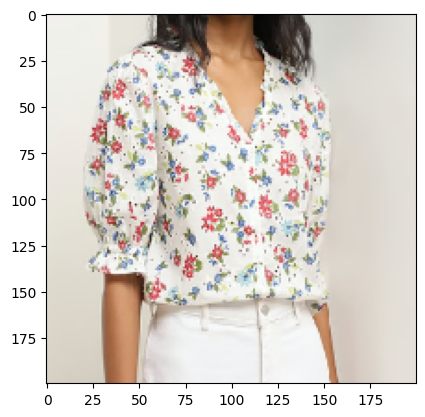

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
does not have bows


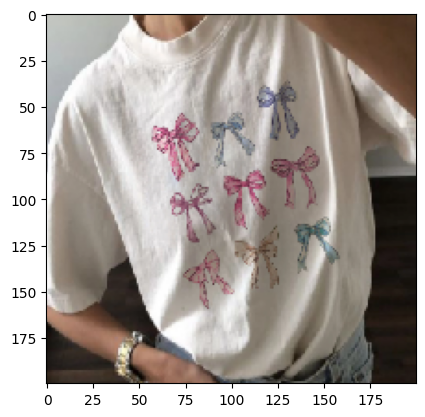

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
it has bows


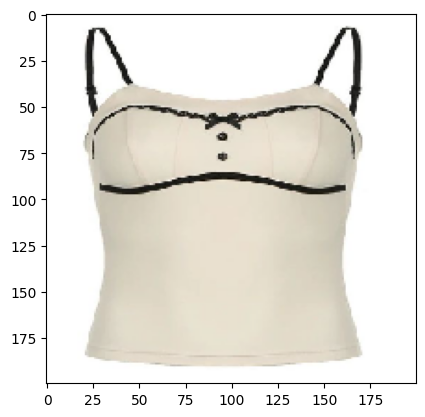

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
it has bows


In [12]:
image_path = "C:/Users/jiash/OneDrive/Desktop/deep_learning/base_data/testing/"
for i in os.listdir(image_path):
    img=image.load_img(image_path+ str(i),target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("it has bows")
    else:
        print("does not have bows")
    